In [1]:
MexicoMapsLink="https://github.com/AyeliAlp/ejercicicios_sem11/raw/main/maps/mexicoMaps_6366.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(MexicoMapsLink)

['country',
 'cities',
 'rivers',
 'border',
 'airports',
 'states',
 'municipalities']

In [2]:
#Realizamos la lectura de los datos:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

states=gpd.read_file(MexicoMapsLink,layer='states')
municipalities=gpd.read_file(MexicoMapsLink,layer='municipalities')
airports=gpd.read_file(MexicoMapsLink,layer='airports')
rivers=gpd.read_file(MexicoMapsLink,layer='rivers')
border=gpd.read_file(MexicoMapsLink,layer='border')

In [3]:
#Primero descargamos informacion importante sobre los principales puertos y terminales a nivel mundial
#y los leemos
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
#Primero reenombramos la columna Main Port Name a portName. Luego, obtenemos la información
#general y resumida sobre el DataFrame
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [5]:
#Ahora creamos un nuevo GeoDataFrame llamado "seaports". Además generamos una geometria de puntos a partir de la
#columnas de longitud y latitud. Como podemos notar, no está proyectado. Luego, transformamos los datos de 
#seaports_mex al sistema de referencia de coordenadas proyectado con codigo 6366 
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)# notice it is unprojected

seaports_mex=seaports[seaports['Country Code']=='Mexico'].copy()

seaports_mex.reset_index(drop=True, inplace=True)

seaports_mex_6366=seaports_mex.to_crs(6366) # projected crs

<Axes: >

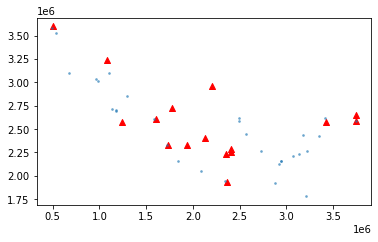

In [6]:
#Creamos un nuevo DataFrame llamado largeAirports seleccionando "airports" donde el valor de la columna
#"kind" es "large_airport". Luego, graficamos los aeropuertos que se representan como triangulos rojos
#y los punto celestes representan a los puertos maritimos de mexico.
# subsetting
largeAirports=airports[airports.kind=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_mex_6366.plot(ax=base,alpha=0.5,markersize=3)

In [7]:
#Exercise 1
#Create two sets of points.

#Compute the distance matrix for both sets.

#Select one row of the distance matrix, and plot the two point with the minimal distance

In [8]:
#Distance
#Between points
#The easiest way to understand distance is to compute how far two coordinates are from each other.

#Visualizamos los puertos maritimos de Mexico:

seaports_mex_6366.head()

,portName,Country Code,Latitude,Longitude,geometry
0,San Juan De La Costa,Mexico,24.400000,-110.700000,POINT (1139638.154 2713079.997)
1,Ensenada,Mexico,31.866667,-116.633333,POINT (534683.789 3525715.483)
2,Nanchital,Mexico,18.066667,-94.416667,POINT (2941397.171 2152554.402)
3,Puerto Madero,Mexico,14.700000,-92.450000,POINT (3216453.523 1779825.278)
4,Salina Cruz,Mexico,16.166667,-95.200000,POINT (2879560.614 1918015.619)


In [9]:
#Visualizamos los aeropuertos grandes de Mexico:

largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Aeropuerto Internacional de Cancún,large_airport,21.039444,-86.874304,22.0,Quintana Roo,Ciudad de Cancún,POINT (3741409.252 2653792.191)
1,Aeropuerto Internacional Lic. Benito Juárez,large_airport,19.435433,-99.082432,7316.0,Ciudad de México,Ciudad de México,POINT (2405228.229 2250478.724)
2,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,large_airport,20.679746,-105.246685,23.0,Jalisco,Ciudad de Puerto Vallarta,POINT (1730617.034 2331720.217)
3,Aeropuerto Internacional de Los Cabos,large_airport,23.156420,-109.716811,374.0,Baja California Sur,Ciudad de San José del Cabo,POINT (1246928.023 2579572.848)
4,Aeropuerto Internacional Miguel Hidalgo,large_airport,20.525040,-103.301557,5016.0,Jalisco,Ciudad de Tlajomulco de Zúñiga,POINT (1938524.286 2330692.695)


In [10]:
#Si ambos GeoDataFrame tienen en el mismo crs proyectado, podemos usar la funcion distancia:

#Calculamos la distancia en kilometros entre la geometria del primer aeropuerto grande que aparece 
#en el DataFrame y la geometria del primer puerto del DataFrame "seaports_mex_6366"
largeAirports.iloc[0].geometry.distance(seaports_mex_6366.iloc[0].geometry)/1000

2602.4465202278006

In [11]:
#Calculamos todas las distancias entre cada geometria de los puertos y todas las geometrias de los
#aeropuertos en km:

#Prueba 1
seaports_mex_6366.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2602.446520,1347.485873,703.342959,171.275436,885.685667,1097.656925,2289.820147,1448.137235,1092.960719,2611.675153,476.017457,1036.627993,523.643977,1304.838772,633.909494,1338.737639
1,3323.151881,2263.882792,1689.935213,1184.262528,1843.596379,1765.944010,3042.109746,2421.785631,81.925302,3347.738364,1411.481952,1950.457375,618.548791,2230.791124,1474.784392,2246.467619
2,944.064961,545.037895,1223.964432,1747.446837,1018.571193,1092.536017,644.634535,619.053487,2836.762080,916.713734,1412.391392,850.328088,2152.613260,593.746156,1300.886752,549.343872
3,1019.508059,937.870536,1585.023058,2125.706205,1391.602689,1554.155365,825.329335,869.053119,3268.534900,967.149624,1811.512435,1253.064586,2584.199725,975.272665,1725.235596,953.718847
4,1133.203529,579.243409,1221.156356,1761.575188,1027.546466,1241.732869,856.700959,518.348813,2912.697792,1096.842807,1448.924282,893.208210,2229.189719,613.741569,1369.453170,598.155280
5,2564.137250,1307.259243,664.351445,138.916315,845.731568,1063.794492,2251.091857,1409.044957,1126.013430,2573.065113,435.991574,996.406770,542.203458,1264.646726,596.280570,1298.504226
6,600.845236,797.360128,1452.972022,1937.491496,1245.843802,1102.236370,281.659335,961.426072,2917.641843,587.395497,1585.012954,1052.080818,2244.189348,851.886092,1434.490909,785.974839
7,3380.485238,2331.596045,1760.275597,1255.016919,1913.108583,1825.788938,3101.496467,2491.426992,23.046709,3405.822972,1481.101500,2018.505631,684.148792,2298.886222,1542.030671,2313.884427
8,325.963895,1077.407512,1711.065808,2170.622748,1506.742618,1256.245058,42.891298,1258.141855,3075.433120,332.741209,1814.517975,1307.553256,2416.461870,1132.024936,1647.095630,1062.084880
9,2451.483961,1261.484415,679.093497,280.525040,827.807193,916.601757,2145.233033,1405.748912,1090.619885,2464.658407,395.542763,946.197574,436.530418,1224.543085,492.653309,1247.533601


In [12]:
#Aaui tambien calculamos las distancias pero esta vez utilizamos los nombres de los puertos y aeropuertos como indices
#para realizar la comparación, en km.
#Prueba 2
seaports_mex_6366.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name,Aeropuerto Internacional de Cancún,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional de Los Cabos,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional Gral. Mariano Escobedo,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Juan N. Álvarez,Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional Gral. Rafael Buelna,Aeropuerto Internacional Del Bajío,General Ignacio P. Garcia International Airport,Aeropuerto Internacional Adolfo López Mateos,"Aeropuerto Internacional Gral, Guadalupe Victoria",General Felipe Ángeles International Airport
portName,,,,,,,,,,,,,,,,
San Juan De La Costa,2602.446520,1347.485873,703.342959,171.275436,885.685667,1097.656925,2289.820147,1448.137235,1092.960719,2611.675153,476.017457,1036.627993,523.643977,1304.838772,633.909494,1338.737639
Ensenada,3323.151881,2263.882792,1689.935213,1184.262528,1843.596379,1765.944010,3042.109746,2421.785631,81.925302,3347.738364,1411.481952,1950.457375,618.548791,2230.791124,1474.784392,2246.467619
Nanchital,944.064961,545.037895,1223.964432,1747.446837,1018.571193,1092.536017,644.634535,619.053487,2836.762080,916.713734,1412.391392,850.328088,2152.613260,593.746156,1300.886752,549.343872
Puerto Madero,1019.508059,937.870536,1585.023058,2125.706205,1391.602689,1554.155365,825.329335,869.053119,3268.534900,967.149624,1811.512435,1253.064586,2584.199725,975.272665,1725.235596,953.718847
Salina Cruz,1133.203529,579.243409,1221.156356,1761.575188,1027.546466,1241.732869,856.700959,518.348813,2912.697792,1096.842807,1448.924282,893.208210,2229.189719,613.741569,1369.453170,598.155280
Pichilingue,2564.137250,1307.259243,664.351445,138.916315,845.731568,1063.794492,2251.091857,1409.044957,1126.013430,2573.065113,435.991574,996.406770,542.203458,1264.646726,596.280570,1298.504226
Cayo Arcas Terminal,600.845236,797.360128,1452.972022,1937.491496,1245.843802,1102.236370,281.659335,961.426072,2917.641843,587.395497,1585.012954,1052.080818,2244.189348,851.886092,1434.490909,785.974839
Rosarito,3380.485238,2331.596045,1760.275597,1255.016919,1913.108583,1825.788938,3101.496467,2491.426992,23.046709,3405.822972,1481.101500,2018.505631,684.148792,2298.886222,1542.030671,2313.884427
Progreso,325.963895,1077.407512,1711.065808,2170.622748,1506.742618,1256.245058,42.891298,1258.141855,3075.433120,332.741209,1814.517975,1307.553256,2416.461870,1132.024936,1647.095630,1062.084880


In [13]:
#calculamos las distancias en kilómetros entre cada puerto en seaports_mex_6366 y todos los aeropuertos en largeAirports, utilizando 
#los nombres como índices para realizar la comparación. Luego, ordenamos los resultados por los nombres de los puertos y 
#los nombres de los aeropuertos, tanto en las filas como en las columnas.
#Prueba 3
seaports_mex_6366.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Aeropuerto Internacional Adolfo López Mateos,Aeropuerto Internacional Del Bajío,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional Gral. Mariano Escobedo,Aeropuerto Internacional Gral. Rafael Buelna,Aeropuerto Internacional Juan N. Álvarez,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional de Cancún,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional de Los Cabos,General Felipe Ángeles International Airport,General Ignacio P. Garcia International Airport
portName,,,,,,,,,,,,,,,,
Acapulco,289.766332,503.887692,965.598951,2474.999264,1027.206382,989.387618,22.208842,312.980307,722.965938,1256.303014,557.970449,1569.996461,1547.477203,1265.141207,349.443528,1803.446912
Altamira,409.419800,427.033859,730.942114,2223.490117,449.703931,893.709572,694.645704,377.938398,817.223275,929.976297,627.115182,1245.616674,1252.321052,1249.968672,341.713132,1544.729586
Campeche,1013.806910,1220.032829,1601.886742,3077.084510,1257.764326,1753.653019,1103.183476,959.550721,1620.204548,167.361625,1412.808148,452.755027,430.364478,2106.229618,949.913667,2406.150141
Cayo Arcas Terminal,851.886092,1052.080818,1434.490909,2917.641843,1102.236370,1585.012954,961.426072,797.360128,1452.972022,281.659335,1245.843802,600.845236,587.395497,1937.491496,785.974839,2244.189348
Ciudad Del Carmen,868.333139,1102.023041,1520.637308,3031.505746,1232.534505,1654.311261,918.779393,815.977588,1492.247742,378.057211,1284.561498,652.389673,620.569986,1999.891454,812.837949,2352.144674
Coatzacoalcos,591.221502,846.290296,1295.444916,2830.662894,1084.410965,1408.081494,621.377243,542.104040,1221.305674,639.153702,1015.644990,939.968700,913.216622,1743.837313,545.784741,2146.595125
Dos Bocas Terminal,718.243525,961.366312,1394.846496,2919.360521,1142.251526,1519.057992,762.296350,666.959504,1345.726659,508.030961,1138.653832,801.549783,773.272368,1860.510868,666.436586,2237.087776
Ensenada,2230.791124,1950.457375,1474.784392,81.925302,1765.944010,1411.481952,2421.785631,2263.882792,1689.935213,3042.109746,1843.596379,3323.151881,3347.738364,1184.262528,2246.467619,618.548791
Frontera,780.556974,1019.198936,1445.997841,2964.845524,1177.127873,1574.597230,828.226190,728.708294,1406.478397,450.358127,1199.064670,737.900458,708.436202,1918.028027,726.873508,2283.718079


In [14]:
#Nos quedamos con la prueba:
#Calculamos una matriz de distancias en kilómetros entre cada puerto en seaports_mex_6366 y todos los aeropuertos en largeAirports, 
#utilizando los nombres como índices para realizar la comparación. La matriz resultante está ordenada por los nombres de los puertos 
#y los nombres de los aeropuertos, tanto en las filas como en las columnas, y le asignamos la variable distanceMatrixKM_sea_air.

distanceMatrixKM_sea_air= seaports_mex_6366.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [15]:
#Este es un marco de datos (pandas), y las instalaciones son índices de fila y columna. Esto es útil de esta manera:

#calculamos el promedio de las distancias en kilómetros entre cada puerto en seaports_mex_6366 y los aeropuertos en largeAirports, y luego mostr 
#los puertos ordenados en función de sus distancias promedio de menor a mayor
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Puerto Vallarta 880.538435
Tampico 882.982819
Altamira 888.471710
Tuxpan 895.915410
Manzanillo 910.039664
Lazaro Cardenas 916.510845
Mazatlan 919.383720
Acapulco 978.673756
Veracruz 1001.286446
Topolobampo 1141.641053
Coatzacoalcos 1149.068764
Minatitlan 1150.793429
Nanchital 1153.005918
La Paz 1189.330323
Pichilingue 1192.339937
Dos Bocas Terminal 1213.478191
Salina Cruz 1218.857526
San Juan De La Costa 1222.766373
Cayo Arcas Terminal 1239.906672
Frontera 1246.882271
Ciudad Del Carmen 1296.050135
Campeche 1345.796862
Guaymas 1346.693316
Progreso 1383.562104
Isla San Marcos 1399.009799
Santa Rosalia 1417.402829
Puerto Madero 1490.433547
San Miguel De Cozumel 1620.004156
Puerto Morro Redondo 1665.259235
Ensenada 1931.053944
Rosarito 1989.163856
dtype: float64

In [16]:
#Calcuamos el promedio de las distancias para cada puerto, la distancia minima para cada puerto y 
#la distancia maxima para cada puerto:

SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats.head()

,mean,min,max
portName,,,
Acapulco,978.673756,22.208842,2474.999264
Altamira,888.471710,341.713132,2223.490117
Campeche,1345.796862,167.361625,3077.084510
Cayo Arcas Terminal,1239.906672,281.659335,2917.641843
Ciudad Del Carmen,1296.050135,378.057211,3031.505746


In [17]:
#También podemos usar idxmax para obtener las ubicaciones particulares:

#Buscamos el indice del valor maximo en cada fila de la matriz de distancia
#(aeropuerto más lejano a cada puerto marítimo) 
distanceMatrixKM_sea_air.idxmax(axis="columns")

portName
Acapulco Aeropuerto Internacional Gral. Abelardo Rodriguez
Altamira Aeropuerto Internacional Gral. Abelardo Rodriguez
Campeche Aeropuerto Internacional Gral. Abelardo Rodriguez
Cayo Arcas Terminal Aeropuerto Internacional Gral. Abelardo Rodriguez
Ciudad Del Carmen Aeropuerto Internacional Gral. Abelardo Rodriguez
Coatzacoalcos Aeropuerto Internacional Gral. Abelardo Rodriguez
Dos Bocas Terminal Aeropuerto Internacional Gral. Abelardo Rodriguez
Ensenada Aeropuerto Internacional de Cozumel
Frontera Aeropuerto Internacional Gral. Abelardo Rodriguez
Guaymas Aeropuerto Internacional de Cozumel
Isla San Marcos Aeropuerto Internacional de Cozumel
La Paz Aeropuerto Internacional de Cozumel
Lazaro Cardenas Aeropuerto Internacional Gral. Abelardo Rodriguez
Manzanillo Aeropuerto Internacional Gral. Abelardo Rodriguez
Mazatlan Aeropuerto Internacional de Cozumel
Minatitlan Aeropuerto Internacional Gral. Abelardo Rodriguez
Nanchital Aeropuerto Internacional Gral. Abelardo Rodriguez
Pichilingue Aeropuerto Internacional de Cozumel
Progreso Aeropuerto Internacional Gral. Abelardo Rodriguez
Puerto Madero Aeropuerto Internacional Gral. Abelardo Rodriguez
Puerto Morro Redondo Aeropuerto Internacional de Cozumel
Puerto Vallarta Aeropuerto Internacional de Cancún
Rosarito Aeropuerto Internacional de Cozumel
Salina Cruz Aeropuerto Internacional Gral. Abelardo Rodriguez
San Juan De La Costa Aeropuerto Internacional de Cozumel
San Miguel De Cozumel Aeropuerto Internacional Gral. Abelardo Rodriguez
Santa Rosalia Aeropuerto Internacional de Cozumel
Tampico Aeropuerto Internacional Gral. Abelardo Rodriguez
Topolobampo Aeropuerto Internacional de Cozumel
Tuxpan Aeropuerto Internacional Gral. Abelardo Rodriguez
Veracruz Aeropuerto Internacional Gral. Abelardo Rodriguez
dtype: object

In [18]:
#puerto marítimo más lejano a cada aeropuerto 
distanceMatrixKM_sea_air.idxmax(axis="rows")

name
Aeropuerto Internacional Adolfo López Mateos Rosarito
Aeropuerto Internacional Del Bajío Rosarito
Aeropuerto Internacional Gral, Guadalupe Victoria San Miguel De Cozumel
Aeropuerto Internacional Gral. Abelardo Rodriguez San Miguel De Cozumel
Aeropuerto Internacional Gral. Mariano Escobedo Rosarito
Aeropuerto Internacional Gral. Rafael Buelna San Miguel De Cozumel
Aeropuerto Internacional Juan N. Álvarez Rosarito
Aeropuerto Internacional Lic. Benito Juárez Rosarito
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz San Miguel De Cozumel
Aeropuerto Internacional Manuel Crescencio Rejón Rosarito
Aeropuerto Internacional Miguel Hidalgo Rosarito
Aeropuerto Internacional de Cancún Rosarito
Aeropuerto Internacional de Cozumel Rosarito
Aeropuerto Internacional de Los Cabos San Miguel De Cozumel
General Felipe Ángeles International Airport Rosarito
General Ignacio P. Garcia International Airport San Miguel De Cozumel
dtype: object

In [19]:
#aeropuerto más cercano a cada puerto de mar
distanceMatrixKM_sea_air.idxmin(axis="columns")

portName
Acapulco Aeropuerto Internacional Juan N. Álvarez
Altamira General Felipe Ángeles International Airport
Campeche Aeropuerto Internacional Manuel Crescencio Rejón
Cayo Arcas Terminal Aeropuerto Internacional Manuel Crescencio Rejón
Ciudad Del Carmen Aeropuerto Internacional Manuel Crescencio Rejón
Coatzacoalcos Aeropuerto Internacional Lic. Benito Juárez
Dos Bocas Terminal Aeropuerto Internacional Manuel Crescencio Rejón
Ensenada Aeropuerto Internacional Gral. Abelardo Rodriguez
Frontera Aeropuerto Internacional Manuel Crescencio Rejón
Guaymas General Ignacio P. Garcia International Airport
Isla San Marcos General Ignacio P. Garcia International Airport
La Paz Aeropuerto Internacional de Los Cabos
Lazaro Cardenas Aeropuerto Internacional Juan N. Álvarez
Manzanillo Aeropuerto Internacional Miguel Hidalgo
Mazatlan Aeropuerto Internacional Gral. Rafael Buelna
Minatitlan Aeropuerto Internacional Lic. Benito Juárez
Nanchital Aeropuerto Internacional Lic. Benito Juárez
Pichilingue Aeropuerto Internacional de Los Cabos
Progreso Aeropuerto Internacional Manuel Crescencio Rejón
Puerto Madero Aeropuerto Internacional Manuel Crescencio Rejón
Puerto Morro Redondo General Ignacio P. Garcia International Airport
Puerto Vallarta Aeropuerto Internacional Lic. Gustavo Díaz Ordaz
Rosarito Aeropuerto Internacional Gral. Abelardo Rodriguez
Salina Cruz Aeropuerto Internacional Juan N. Álvarez
San Juan De La Costa Aeropuerto Internacional de Los Cabos
San Miguel De Cozumel Aeropuerto Internacional de Cozumel
Santa Rosalia General Ignacio P. Garcia International Airport
Tampico General Felipe Ángeles International Airport
Topolobampo Aeropuerto Internacional de Los Cabos
Tuxpan General Felipe Ángeles International Airport
Veracruz General Felipe Ángeles International Airport
dtype: object

In [20]:
#puerto marítimo más cercano a cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="rows")

name
Aeropuerto Internacional Adolfo López Mateos Acapulco
Aeropuerto Internacional Del Bajío Lazaro Cardenas
Aeropuerto Internacional Gral, Guadalupe Victoria Mazatlan
Aeropuerto Internacional Gral. Abelardo Rodriguez Rosarito
Aeropuerto Internacional Gral. Mariano Escobedo Altamira
Aeropuerto Internacional Gral. Rafael Buelna Mazatlan
Aeropuerto Internacional Juan N. Álvarez Acapulco
Aeropuerto Internacional Lic. Benito Juárez Tuxpan
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz Puerto Vallarta
Aeropuerto Internacional Manuel Crescencio Rejón Progreso
Aeropuerto Internacional Miguel Hidalgo Manzanillo
Aeropuerto Internacional de Cancún San Miguel De Cozumel
Aeropuerto Internacional de Cozumel San Miguel De Cozumel
Aeropuerto Internacional de Los Cabos La Paz
General Felipe Ángeles International Airport Tuxpan
General Ignacio P. Garcia International Airport Guaymas
dtype: object

<Axes: >

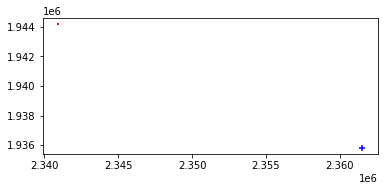

In [60]:
#plot con un aeropuerto grande y puerto maritimo seleccionado.
base=largeAirports[largeAirports.name=='Aeropuerto Internacional Juan N. Álvarez'].plot(color='blue', marker='+')
seaports_mex_6366[seaports_mex_6366.portName=='Acapulco'].plot(ax=base, alpha=1, markersize=3, color='red', marker='+')

In [21]:
#Ejercicio 2
#Crear un conjunto de puntos y un conjunto de líneas.

#Calcule la matriz de distancias para ambos conjuntos.

#Seleccione una línea de la matriz de distancia y trace el punto más cercano y el más lejano a esa línea.

In [22]:
#Distancia entre línea y punto
#Visualizamos los rios que tenemos:

rivers

,NAME,SYSTEM,geometry
0,"Rio Grande, North America",NaN,"MULTILINESTRING ((2514047.388 3016511.788, 250..."
1,Colorado,NaN,"LINESTRING (713872.391 3595816.254, 692284.443..."


In [23]:
#Mantenemos uno:

rivers[rivers.NAME.str.contains('Grande')]

,NAME,SYSTEM,geometry
0,"Rio Grande, North America",NaN,"MULTILINESTRING ((2514047.388 3016511.788, 250..."


In [24]:
#Puedes ver que la distancia funciona entre estos dos elementos::

rivers[rivers.NAME.str.contains('Grande')].iloc[0].geometry.distance(largeAirports.geometry)

0 1.279837e+06
1 7.704278e+05
2 9.703805e+05
3 9.312980e+05
4 8.422693e+05
5 2.178519e+05
6 1.011334e+06
7 1.086941e+06
8 1.089424e+06
9 1.306648e+06
10 7.368219e+05
11 6.864761e+05
12 5.715825e+05
13 7.907984e+05
14 5.745891e+05
15 7.338320e+05
Name: geometry, dtype: float64

In [25]:
#Basándonos en lo que hicimos anteriormente, calculemos todas las distancias en kilómetros entre cada río en rivers y todos los aeropuertos en largeAirports, 
#utilizando los nombres de los ríos y los aeropuertos como índices.

distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Aeropuerto Internacional Adolfo López Mateos,Aeropuerto Internacional Del Bajío,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional Gral. Mariano Escobedo,Aeropuerto Internacional Gral. Rafael Buelna,Aeropuerto Internacional Juan N. Álvarez,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional de Cancún,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional de Los Cabos,General Felipe Ángeles International Airport,General Ignacio P. Garcia International Airport
NAME,,,,,,,,,,,,,,,,
Colorado,2078.616721,1798.363745,1319.059176,192.397755,1587.317145,1273.355035,2281.509091,2109.444814,1560.734365,2862.518257,1703.000037,3140.640743,3166.203620,1079.887165,2090.449426,459.749561
"Rio Grande, North America",790.798389,686.476124,574.589136,1089.424089,217.851939,736.821904,1086.941280,770.427785,970.380523,1011.333855,842.269288,1279.836962,1306.647872,931.298035,733.831960,571.582521


In [26]:
#Aquí, vemos una fila (río), que indica la distancia a cada columna (aeropuerto grande):
distanceMatrixKM_riv_air.loc['Rio Grande, North America'].sort_values()

name
Aeropuerto Internacional Gral. Mariano Escobedo 217.851939
General Ignacio P. Garcia International Airport 571.582521
Aeropuerto Internacional Gral, Guadalupe Victoria 574.589136
Aeropuerto Internacional Del Bajío 686.476124
General Felipe Ángeles International Airport 733.831960
Aeropuerto Internacional Gral. Rafael Buelna 736.821904
Aeropuerto Internacional Lic. Benito Juárez 770.427785
Aeropuerto Internacional Adolfo López Mateos 790.798389
Aeropuerto Internacional Miguel Hidalgo 842.269288
Aeropuerto Internacional de Los Cabos 931.298035
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz 970.380523
Aeropuerto Internacional Manuel Crescencio Rejón 1011.333855
Aeropuerto Internacional Juan N. Álvarez 1086.941280
Aeropuerto Internacional Gral. Abelardo Rodriguez 1089.424089
Aeropuerto Internacional de Cancún 1279.836962
Aeropuerto Internacional de Cozumel 1306.647872
Name: Rio Grande, North America, dtype: float64

In [27]:
#Graficamos:

base=rivers[rivers.NAME.str.contains('Grande')].explore()
largeAirports.explore(m=base,color='red',marker_kwds=dict(radius=10))

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_96fa7f706c413e7fe88a07f81929268d {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_96fa7f706c413e7fe88a07f81929268d" ></div>
 
</body>
<script>
 
 
 var map_96fa7f706c413e7fe88a07f81929268d = L.map(
 "map_96fa7f706c413e7fe88a07f81929268d",
 {
 center: [28.48173937094222, -101.39345187034701],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_96fa7f706c413e7fe88a07f81929268d);

 

 
 
 var tile_layer_40a6bdd39938d90b5cadf77aa25ba2e2 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_96fa7f706c413e7fe88a07f81929268d);
 
 
 map_96fa7f706c413e7fe88a07f81929268d.fitBounds(
 [[25.85974201443421, -105.63897942633547], [31.103736727450226, -97.14792431435856]],
 {}
 );
 
 
 function geo_json_39da592f2ff7b116d739ad8eabc300b1_styler(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_39da592f2ff7b116d739ad8eabc300b1_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_39da592f2ff7b116d739ad8eabc300b1_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_39da592f2ff7b116d739ad8eabc300b1_styler(feature)
 Object.assign(opts, 

In [28]:
#Nos centramos en los que pertenecen a un sistema, pero al correr el digo estos datos no presentan informacion sobre 
#quienes pertenecen a un sistema 

rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [29]:
#Disolvemos los que pertenecen a un sistema en una multilínea:

systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,


In [30]:
#Creamos una nueva columna que contenga los nombres de los sistemas que contiene los nombres de los sistemas:

# format the GDF:
systems['NAME']=systems.index
systems.reset_index(drop=True,inplace=True)
systems

,geometry,NAME


In [31]:
#Calculamos la matriz de distancia en kilometros entre los sistemas y los grandes aeropuertos.
#Pero como no presentamos informacion de sistema, el codigo nos arrojará un error.

distanceMatrixKM_sys_air=systems.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=0)

distanceMatrixKM_sys_air

GeoSeries([], Name: geometry, dtype: geometry)

In [32]:
#Obtenemos las minimas distancias:

mins=distanceMatrixKM_sys_air.idxmin(axis="columns")
mins

TypeError: TypeError: '>=' not supported between instances of 'str' and 'int'

In [37]:
#Visualizamos uno de llos
mins[1]

NameError: NameError: name 'mins' is not defined

In [38]:
#Visualizamos de manera interactiva los sistemas del DataFrame "systems". Luego, mostramos dos visualzaciones
#adicioanles para resaltar los aeropuertos que son mas cercanos y los que no son las mas cercanos del sistema.
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# the NOT closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

ValueError: ValueError: Location values cannot contain NaNs.

In [ ]:
#Ejercicio 3
#Crear un conjunto de puntos y un conjunto de polígonos
#Calcule la matriz de distancias para ambos conjuntos.
#Seleccione un polígono de la matriz de distancia y trace el punto más cercano y el más lejano a ese polígono.

In [51]:
#Creamos un poligono convexo del DataFrame de systems:

systems.convex_hull.plot()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/plotting.py:409: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

In [1]:
#Ahora, un GDF para los cascos:

systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['', '']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:6366"
systems_hulls

NameError: NameError: name 'systems' is not defined

In [54]:
#Calculamos la matriz de distancia:

distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

TypeError: TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'NoneType'>)

In [55]:
#Las diferencias minimas :

mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

NameError: NameError: name 'distanceMatrixKM_sysHull_air' is not defined

In [56]:
#Graficamos
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/array.py:968: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/array.py:969: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/array.py:970: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/array.py:971: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: ValueError: Location values cannot contain NaNs.

In [ ]:
#Ejercicio 4
#Crear un conjunto de puntos y un conjunto de líneas.

#Obtenga el búfer para las líneas, seleccione diferentes valores para la distancia.

#Mantenga los puntos que están dentro del búfer (como en el punto 2, debe jugar con diferentes distancias hasta que muestre algo interesante).

In [33]:
#Uso de búferes
#Un caso muy importante en el análisis de distancias es el uso de buffers:

#Recordamos el DataFrame que creamos hace un momento:
distanceMatrixKM_riv_air

name,Aeropuerto Internacional Adolfo López Mateos,Aeropuerto Internacional Del Bajío,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional Gral. Mariano Escobedo,Aeropuerto Internacional Gral. Rafael Buelna,Aeropuerto Internacional Juan N. Álvarez,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional de Cancún,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional de Los Cabos,General Felipe Ángeles International Airport,General Ignacio P. Garcia International Airport
NAME,,,,,,,,,,,,,,,,
Colorado,2078.616721,1798.363745,1319.059176,192.397755,1587.317145,1273.355035,2281.509091,2109.444814,1560.734365,2862.518257,1703.000037,3140.640743,3166.203620,1079.887165,2090.449426,459.749561
"Rio Grande, North America",790.798389,686.476124,574.589136,1089.424089,217.851939,736.821904,1086.941280,770.427785,970.380523,1011.333855,842.269288,1279.836962,1306.647872,931.298035,733.831960,571.582521


In [34]:
#Obtenemos el valor de Colorado
distanceMatrixKM_riv_air.loc['Colorado'].min()

192.39775507831118

In [40]:
#Creamos un buffer con cualquier valor, en este caso utilizamos Colorado:

minMts=distanceMatrixKM_riv_air.loc['Colorado'].min()*10

#El buffer es un poligono:
rivers[rivers.NAME=='Colorado'].buffer(distance = minMts)

1 POLYGON ((694104.729 3569949.073, 691710.946 3...
dtype: geometry

In [41]:
#Visualizamos el buffer:
bufferAroundColorado=rivers[rivers.NAME=='Colorado'].buffer(distance = minMts)
bufferAsBase=bufferAroundColorado.explore(color='red')
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_79fad621455ab83b48b55eff97effd0e {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_79fad621455ab83b48b55eff97effd0e" ></div>
 
</body>
<script>
 
 
 var map_79fad621455ab83b48b55eff97effd0e = L.map(
 "map_79fad621455ab83b48b55eff97effd0e",
 {
 center: [32.155739991247025, -114.81300223830218],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_79fad621455ab83b48b55eff97effd0e);

 

 
 
 var tile_layer_d9f4d0f2d8fb20f55933af4877bf4b8a = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_79fad621455ab83b48b55eff97effd0e);
 
 
 map_79fad621455ab83b48b55eff97effd0e.fitBounds(
 [[31.815122061415632, -115.01133535041264], [32.49635792107841, -114.61466912619173]],
 {}
 );
 
 
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd

In [42]:
#Al buffer le agregaremos una capa de aeropuertos pequeños:

small_airports=airports[airports.kind=='small_airport']

# plotting
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_79fad621455ab83b48b55eff97effd0e {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_79fad621455ab83b48b55eff97effd0e" ></div>
 
</body>
<script>
 
 
 var map_79fad621455ab83b48b55eff97effd0e = L.map(
 "map_79fad621455ab83b48b55eff97effd0e",
 {
 center: [32.155739991247025, -114.81300223830218],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_79fad621455ab83b48b55eff97effd0e);

 

 
 
 var tile_layer_d9f4d0f2d8fb20f55933af4877bf4b8a = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_79fad621455ab83b48b55eff97effd0e);
 
 
 map_79fad621455ab83b48b55eff97effd0e.fitBounds(
 [[31.815122061415632, -115.01133535041264], [32.49635792107841, -114.61466912619173]],
 {}
 );
 
 
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc5bd_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_e8093b5e778fdfe0a6928bdaf09bc

In [36]:
#Ahora, podemos usar el buffer (polígono) para mantener los aeropuertos que están a esa distancia particular alrededor del río:

riversWithinBuffer=small_airports.clip(mask=bufferAroundColorado)
#
riversWithinBuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
874,La Mesa Airport,small_airport,32.10598,-114.98503,75.0,Baja California,Mexicali,POINT (690122.621 3553960.141)


In [43]:
#Visualizamos interactivamente al buffer alrededor del rio colorado en rojo, el rio Colorado en azul
#y los rios dentro del buffer en negro
bufferAsBase=bufferAroundColorado.explore(color='red')
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_d8cd2d3987598fba6980e374ab417fac {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_d8cd2d3987598fba6980e374ab417fac" ></div>
 
</body>
<script>
 
 
 var map_d8cd2d3987598fba6980e374ab417fac = L.map(
 "map_d8cd2d3987598fba6980e374ab417fac",
 {
 center: [32.155739991247025, -114.81300223830218],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_d8cd2d3987598fba6980e374ab417fac);

 

 
 
 var tile_layer_3ec45fb45d73fadfff23e1e132174d1a = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_d8cd2d3987598fba6980e374ab417fac);
 
 
 map_d8cd2d3987598fba6980e374ab417fac.fitBounds(
 [[31.815122061415632, -115.01133535041264], [32.49635792107841, -114.61466912619173]],
 {}
 );
 
 
 function geo_json_07ba2b2e23da58793f995924b86c5bd1_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_07ba2b2e23da58793f995924b86c5bd1_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_07ba2b2e23da58793f995924b86c5bd1_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity

In [50]:
#Calculamos el mínimo de todos los mínimos por fila 
distanceMatrixKM_riv_air.min(axis=1).min() 

192.39775507831118

In [44]:
#Usamos el valor anterior y realizamos una visualizacion intercativa que incluye un buffer alrededor de los rios en el DataFrame "rivers" 
#resaltado en rojo. Tambien se visualizarán los rios en azul y los aeropuertos en negro. 
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*10


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=allMinBuffer,color='black')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_0a9f98727705f768aa480b05b6fc0c6f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_0a9f98727705f768aa480b05b6fc0c6f" ></div>
 
</body>
<script>
 
 
 var map_0a9f98727705f768aa480b05b6fc0c6f = L.map(
 "map_0a9f98727705f768aa480b05b6fc0c6f",
 {
 center: [29.171383060917236, -106.0747169014],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_0a9f98727705f768aa480b05b6fc0c6f);

 

 
 
 var tile_layer_e5c6b1f0744a05d00d64db60f37e4390 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_0a9f98727705f768aa480b05b6fc0c6f);
 
 
 map_0a9f98727705f768aa480b05b6fc0c6f.fitBounds(
 [[25.77709504150926, -115.09284012446935], [32.56567108032522, -97.05659367833064]],
 {}
 );
 
 
 function geo_json_eb3c120d1926bc3215c19b8b752476fa_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_eb3c120d1926bc3215c19b8b752476fa_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_eb3c120d1926bc3215c19b8b752476fa_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2

In [45]:
#Vemos todos los poligonos de buffer:
rivers.buffer(distance = minMinMts_5)

0 MULTIPOLYGON (((2505006.528 3008569.003, 25039...
1 POLYGON ((701385.872 3566607.961, 700214.605 3...
dtype: geometry

In [46]:
#Verificamos el tipo
riversAll_buf=rivers.buffer(distance = minMinMts_5)
type(riversAll_buf)

geopandas.geoseries.GeoSeries

In [47]:
#Formateamos:
riversAll_bufDF=riversAll_buf.to_frame()
riversAll_bufDF.rename(columns={0:'geometry'},inplace=True)
riversAll_bufDF = riversAll_bufDF.set_geometry("geometry")
riversAll_bufDF.crs

<Projected CRS: EPSG:6366>
Name: Mexico ITRF2008 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Mexico west of 114°W, onshore and offshore.
- bounds: (-122.19, 15.01, -114.0, 32.72)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
#Hacemos un recorte entre las capas small_airports y riversAll_bufDF, y luego guarda el resultado en el DataFrame allRiversWithinBuffs
allRiversWithinBuffs=small_airports.clip(riversAll_bufDF)
allRiversWithinBuffs

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
816,Santa Elena Airport,small_airport,25.990056,-97.760083,59.0,Tamaulipas,Matamoros,POINT (2448187.965 3021601.915)
386,Rancho San José Airstrip,small_airport,29.646610,-102.335420,2447.0,Coahuila,Ciudad Acuña,POINT (1927297.365 3371250.823)
401,Rancho Loma Blanca Airport,small_airport,29.700410,-102.137158,1476.0,Coahuila,Ciudad Acuña,POINT (1946015.785 3379859.078)
387,La Pistola Airport,small_airport,29.635040,-101.405750,1394.0,Coahuila,Ciudad Acuña,POINT (2019063.387 3382196.961)
405,Los Pecos Airstrip,small_airport,29.654077,-101.466669,1362.0,Coahuila,Ciudad Acuña,POINT (2012759.660 3383518.235)
874,La Mesa Airport,small_airport,32.105980,-114.985030,75.0,Baja California,Mexicali,POINT (690122.621 3553960.141)
866,Zacatecas Airstrip,small_airport,32.165907,-115.039982,30.0,Baja California,Mexicali,POINT (684815.771 3560508.792)
875,Ciudad Coahuila South Airport,small_airport,32.167171,-115.003204,31.0,Baja California,Mexicali,POINT (688281.681 3560712.724)
1137,La Aurora Airport,small_airport,32.236703,-115.010247,39.0,Sonora,San Luis Río Colorado,POINT (687474.734 3568409.783)
1135,Coahuila Strip,small_airport,32.276763,-114.965679,56.0,Sonora,San Luis Río Colorado,POINT (691590.488 3572930.232)


<Axes: >

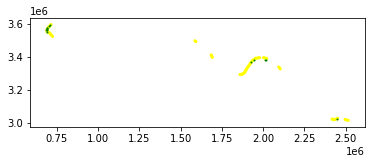

In [49]:
#Graficamos
base=riversAll_bufDF.plot(color='yellow')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=1)

In [50]:
#Graficamos de manera interactiva

base=riversAll_bufDF.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_04cad9fcb251a0fb0c8233b71fe44fd2 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_04cad9fcb251a0fb0c8233b71fe44fd2" ></div>
 
</body>
<script>
 
 
 var map_04cad9fcb251a0fb0c8233b71fe44fd2 = L.map(
 "map_04cad9fcb251a0fb0c8233b71fe44fd2",
 {
 center: [29.171383060917236, -106.0747169014],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_04cad9fcb251a0fb0c8233b71fe44fd2);

 

 
 
 var tile_layer_8c476c1bf57ef6a6bb90b2fe8fbc373a = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_04cad9fcb251a0fb0c8233b71fe44fd2);
 
 
 map_04cad9fcb251a0fb0c8233b71fe44fd2.fitBounds(
 [[25.77709504150926, -115.09284012446935], [32.56567108032522, -97.05659367833064]],
 {}
 );
 
 
 function geo_json_1609dec879328dc43b959c65ffcfd356_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "yellow", "fillColor": "yellow", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_1609dec879328dc43b959c65ffcfd356_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_1609dec879328dc43b959c65ffcfd356_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_1609dec879328dc43b959c65ffcfd356